In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
SEED_VALUE = 42


# to make training deterministic
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print(f"Input features: {X_train[0]}\n\nOutput target: {y_train[0]}")

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

Output target: 15.2


In [5]:
# extract one target feature
boston_features = {
    "Average Numbers of Rooms": 5
}

X_train_1d = X_train[:, boston_features["Average Numbers of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Numbers of Rooms"]]

(404,)


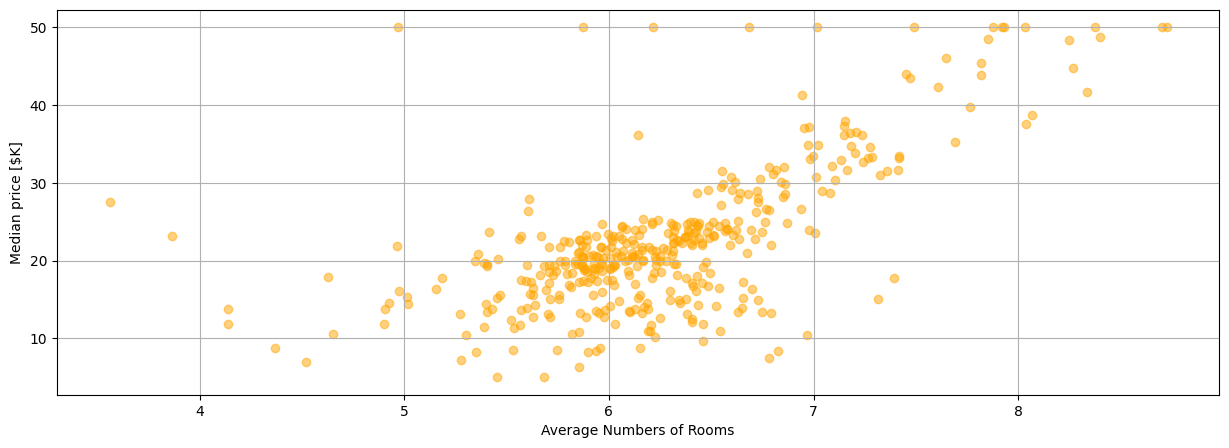

In [6]:
plt.figure(figsize=(15,5))

plt.xlabel("Average Numbers of Rooms")
plt.ylabel("Median price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="orange", alpha=0.5)

In [7]:
# define the Keras model
model = Sequential()

# with 1 neuron
model.add(Input(shape=(1,)))
model.add(Dense(units=1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# compilation
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [9]:
# training
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 245.6270 - val_loss: 326.3054
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223.8670 - val_loss: 306.1152
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 207.5118 - val_loss: 287.4150
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192.3265 - val_loss: 269.6430
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 177.9988 - val_loss: 252.7203
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164.4828 - val_loss: 236.6340
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.7694 - val_loss: 221.3807
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.8542 - val_loss: 206.9584
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128.7332 - val_loss: 193.3648
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.4020 - val_loss: 180.5976
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.8552 - val_loss: 168.6540
Epoch 12/101
18/18

In [10]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'orange', label='Training Loss')
    plt.plot(history.history['val_loss'], 'g', label='Vlidation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

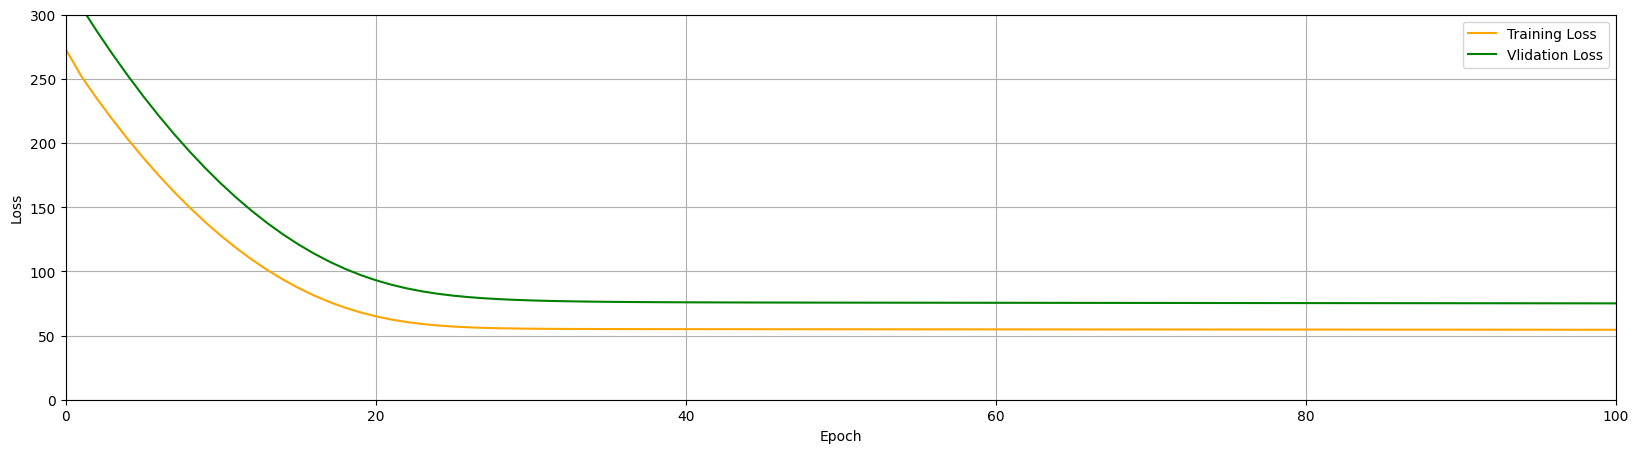

In [11]:
plot_loss(history)

In [12]:
# making predictions
x = np.array([3, 4, 5, 6, 7])

y_pred = model.predict(x)

for idx in range(len(x)):
    print(f'Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10 /10)}K')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted price of a home with 3 rooms: $11K
Predicted price of a home with 4 rooms: $14K
Predicted price of a home with 5 rooms: $18K
Predicted price of a home with 6 rooms: $21K
Predicted price of a home with 7 rooms: $24K


/tmp/ipykernel_17/1498741996.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10 /10)}K')


In [13]:
x = np.linspace(3, 9 ,10)

y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [14]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='orange', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3, 9])
    plt.ylim([0, 60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

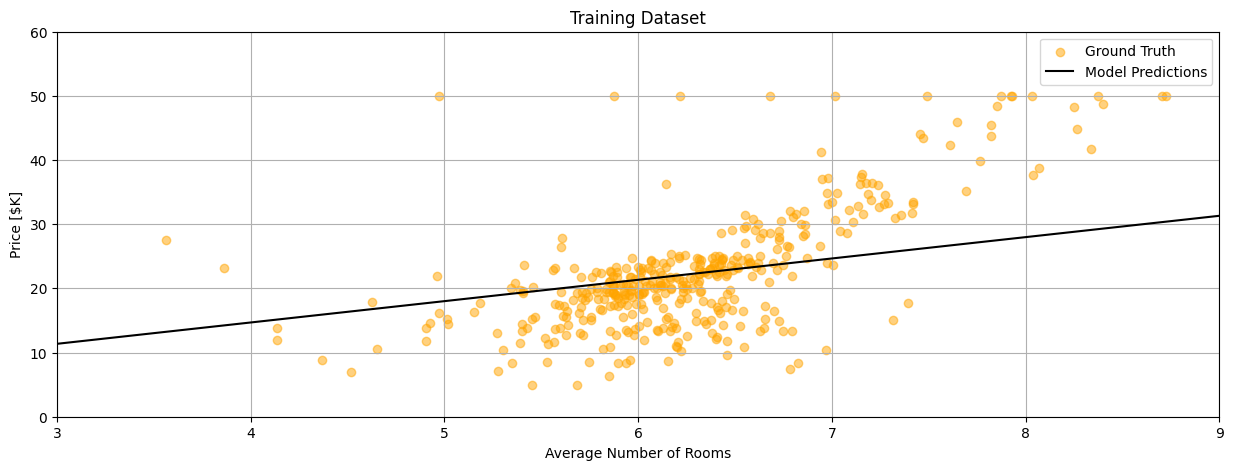

In [15]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

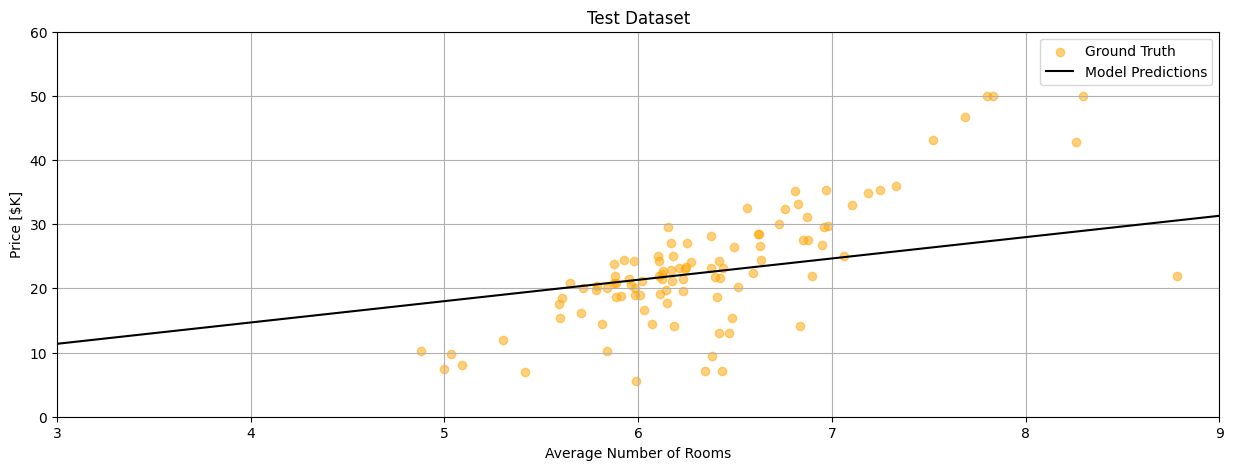

In [16]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')